## Split data into train and test

In [7]:
import splitfolders # or import splitfolders
input_folder = "E:/projects/DFL-BundesligaDataShootout/dataset-20220903T082147Z-001/events-splitted-data/"
output = "E:/projects/DFL-BundesligaDataShootout/dataset-20220903T082147Z-001/ready-data/" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7, .3)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 3144 files [02:22, 22.10 files/s]


In [3]:
train_path='E:/projects/DFL-BundesligaDataShootout/dataset-20220903T082147Z-001/ready-data/train'
val_path='E:/projects/DFL-BundesligaDataShootout/dataset-20220903T082147Z-001/ready-data/val'

In [54]:
from keras.models import Model
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob

In [42]:
import matplotlib.pyplot as plt

In [5]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

    train_datagen = ImageDataGenerator(rescale=1./255,
                                         rotation_range=0.4,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         horizontal_flip=True,
                                         brightness_range=[0.6,0.9],
                                         fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                          batch_size=64,
                                                          class_mode='categorical',
                                                          target_size=(224, 224))

    validation_datagen = ImageDataGenerator(rescale=1./255)

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                    batch_size=64,
                                                                    class_mode='categorical',
                                                                    target_size=(224, 224))
    return train_generator, validation_generator

In [6]:
train_generator, validation_generator = train_val_generators(train_path, val_path)

Found 2199 images belonging to 3 classes.
Found 945 images belonging to 3 classes.


In [36]:
    

model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dense(3,activation='softmax')  
  ])


model.compile(optimizer='adam',
                loss='CategoricalCrossentropy',
                metrics=['accuracy']) 




In [37]:
# model = cnn_model

In [38]:
model.build((None,224,224,3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_28 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 64)      

In [40]:
history = model.fit(train_generator,
                    epochs=5,
                    verbose=True,
                    validation_data=validation_generator)

Epoch 1/5
35/35 [==============================] - 255s 7s/step - loss: 0.6034 - accuracy: 0.8167 - val_loss: 0.9789 - val_accuracy: 0.8159
Epoch 2/5
35/35 [==============================] - 242s 7s/step - loss: 0.5933 - accuracy: 0.8167 - val_loss: 0.8836 - val_accuracy: 0.8159
Epoch 3/5
35/35 [==============================] - 242s 7s/step - loss: 0.5840 - accuracy: 0.8167 - val_loss: 0.9568 - val_accuracy: 0.8159
Epoch 4/5
35/35 [==============================] - 241s 7s/step - loss: 0.6049 - accuracy: 0.8167 - val_loss: 0.8136 - val_accuracy: 0.8159
Epoch 5/5
35/35 [==============================] - 947s 28s/step - loss: 0.6066 - accuracy: 0.8167 - val_loss: 0.8275 - val_accuracy: 0.8159


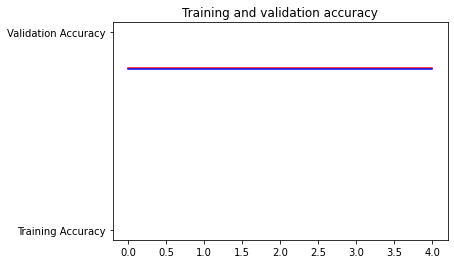

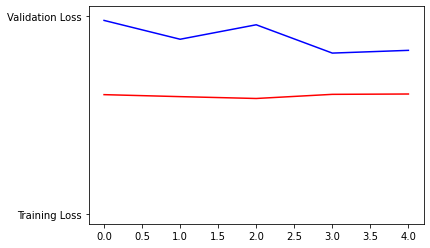

In [45]:
def plot_acc_loss(model_his):
    acc=model_his.history['accuracy']
    val_acc=model_his.history['val_accuracy']
    loss=model_his.history['loss']
    val_loss=model_his.history['val_loss']

    epochs=range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, acc, 'r', "Training Accuracy")
    plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
    plt.title('Training and validation accuracy')
    plt.show()
    print("")

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot(epochs, loss, 'r', "Training Loss")
    plt.plot(epochs, val_loss, 'b', "Validation Loss")
    plt.show()


In [ ]:
plot_loss_acc(history)

In [51]:
from keras_preprocessing.image import load_img


In [102]:
# predicting images
path='E:/projects/DFL-BundesligaDataShootout/dataset-20220903T082147Z-001/a.jpg'
img=load_img(path, target_size=(224,224,3))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])



In [103]:
cnn_classes = model.predict(x)

1/1 [==============================] - 0s 67ms/step


In [104]:
print(cnn_classes)

[[5.2679457e-06 9.9999475e-01 4.1743536e-11]]


In [78]:
if int(cnn_classes[0][0])==1:
    print("challenge")
elif int(cnn_classes[0][1])==1:
    print("play")
elif int(cnn_classes[0][2])==1:
    print("throwin")

## VGG-16

In [84]:
vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 41s 1us/step


In [85]:
for layer in vgg.layers:
    layer.trainable = False

In [87]:
folders = glob(f'{train_path}/*')
x = tf.keras.layers.Flatten()(vgg.output)

In [89]:
prediction = tf.keras.layers.Dense(len(folders), activation='softmax')(x)
# create a model object
VGG_model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
VGG_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [92]:
VGG_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [93]:
vgg_history_1 = VGG_model.fit(train_generator,
                    epochs=2,
                    verbose=1,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(validation_generator))

Epoch 1/2
35/35 [==============================] - 867s 25s/step - loss: 0.7904 - accuracy: 0.7840 - val_loss: 0.6573 - val_accuracy: 0.7841
Epoch 2/2
35/35 [==============================] - 942s 27s/step - loss: 0.6079 - accuracy: 0.8040 - val_loss: 0.6466 - val_accuracy: 0.8148


In [105]:
vgg_classes = VGG_model.predict(x)

1/1 [==============================] - 0s 255ms/step


In [106]:
print(vgg_classes)

[[3.0964243e-32 1.0000000e+00 0.0000000e+00]]


In [107]:
if int(vgg_classes[0][0])==1:
    print("challenge")
elif int(vgg_classes[0][1])==1:
    print("play")
elif int(vgg_classes[0][2])==1:
    print("throwin")

play
